| <center> <a href="https://www.dropbox.com/s/0w8j6ejacfw3lwt/trump.jpg?dl=1"><img src = "https://www.dropbox.com/s/0w8j6ejacfw3lwt/trump.jpg?dl=1" width=500/></a></center> | <center> <a href="https://www.dropbox.com/s/yegx6u3bx8otvh5/pencilSketch.jpg?dl=1"><img src = "https://www.dropbox.com/s/yegx6u3bx8otvh5/pencilSketch.jpg?dl=1" width=500/></a></center> | <center> <a href="https://www.dropbox.com/s/rttwy9wszo76jse/cartoon.jpg?dl=1"><img src = "https://www.dropbox.com/s/rttwy9wszo76jse/cartoon.jpg?dl=1" width=500/></a></center> | 
| -------- | -------- | -------- | 
| <center>Original Image</center>     | <center>Pencil Sketch Result</center>     | <center>Cartoon Filter Result</center>     |


In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
matplotlib.rcParams['image.cmap'] = 'gray'

In [3]:
def cartoonify(image, arguments=0):
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
   
    gray = cv2.medianBlur(gray, 5)
   
    edges = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                  cv2.THRESH_BINARY, blockSize=9, C=2)
   
    color = cv2.bilateralFilter(image, d=9, sigmaColor=300, sigmaSpace=300)
    
    cartoonImage = cv2.bitwise_and(color, color, mask=edges)

    return cartoonImage

In [4]:
def pencilSketch(image, arguments=0):
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    inverted = 255 - gray
    
    blurred = cv2.GaussianBlur(inverted, (21, 21), 0)
    
    inverted_blurred = 255 - blurred
    
    pencil_sketch = cv2.divide(gray, inverted_blurred, scale=256.0)

    return pencil_sketch

In [5]:
imagePath = "./data/trump.jpg"
image = cv2.imread(imagePath)

cartoonImage = cartoonify(image)
pencilSketchImage = pencilSketch(image)

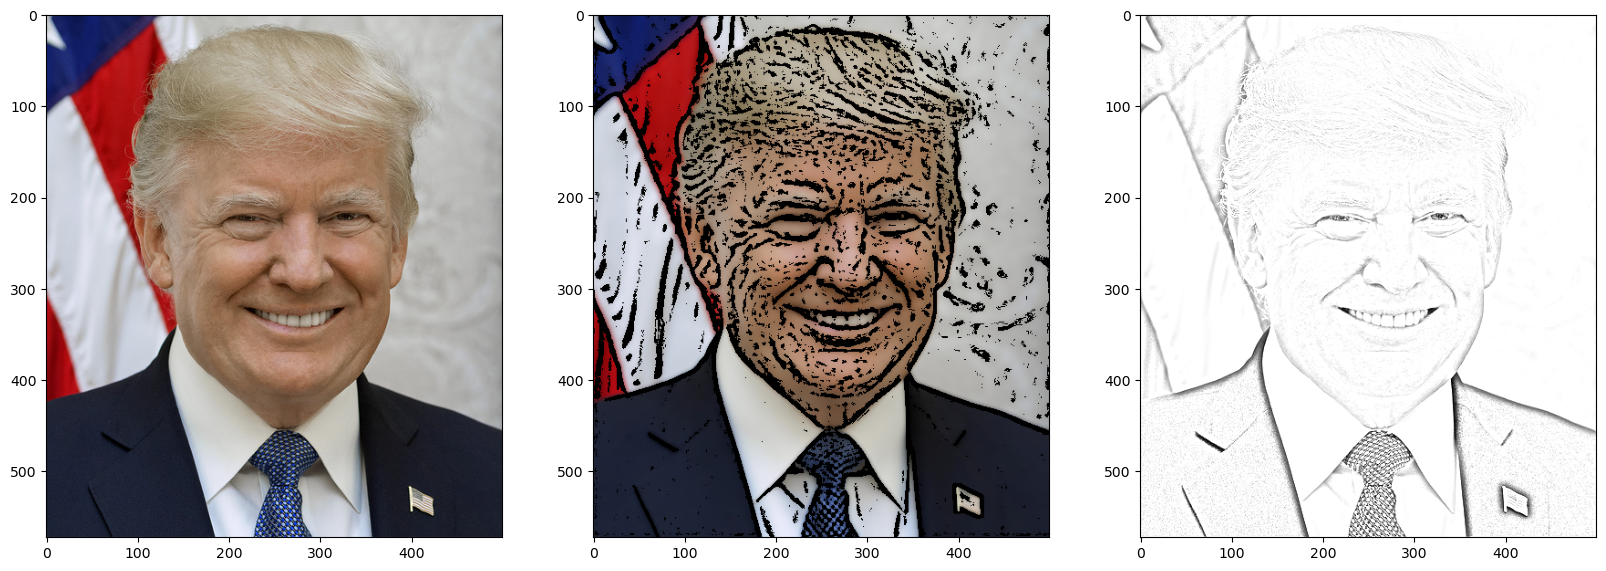

In [6]:
plt.figure(figsize=[20,10])
plt.subplot(131);plt.imshow(image[:,:,::-1]);
plt.subplot(132);plt.imshow(cartoonImage[:,:,::-1]);
plt.subplot(133);plt.imshow(pencilSketchImage);